# <center>Aprendizaje semi supervisado<center>

---
# Inicialización
---

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df

##Se importan dos dataset de 600 y se concatenan
np.random.seed(42)

trainSemi=upload_files()
trainSemi=trainSemi.sample(frac=1)


np.random.seed(42)

testSemi=upload_files()
testSemi=testSemi.sample(frac=1)

Saving DatasetEtiquetadoSemiSupervisado.csv to DatasetEtiquetadoSemiSupervisado.csv
User uploaded file "DatasetEtiquetadoSemiSupervisado.csv" with length 46583 bytes
                                                 frase  etiqueta
0    "La libertad de prensa debe tener límites para...         0
1    "Políticos indiferentes, ciudadanos desesperad...         0
2            "Promesas vanas, problemas persistentes."         0
3    "La pobreza es responsabilidad de los individu...         0
4    "Intereses particulares, bienestar general en ...         0
..                                                 ...       ...
595        "Construyamos un México fuerte y próspero"          1
596  "El acceso universal a servicios básicos como ...         1
597  "Un futuro de justicia y prosperidad para todo...         1
598  "La cooperación entre países y la solidaridad ...         1
599  "El respeto a los derechos individuales, las l...         1

[600 rows x 2 columns]


Saving TestSemi.csv to TestSemi.csv
User uploaded file "TestSemi.csv" with length 54401 bytes


In [ ]:
np.random.seed(42)

train=pd.concat([trainSemi,testSemi])
train=train.sample(frac=1)

##Conjunto de entrenamiento inicial
train_ini=train[:100]
predicciones=train_ini['etiqueta'].tolist()
train_ini['predicciones']=predicciones

##primer conjunto de test
train_200=train[100:300]
##segundo conjunto de test
train_all=train[300:]


<ipython-input-2-564bda854b13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ini['predicciones']=predicciones


In [ ]:
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install

fatal: destination path 'word_cloud' already exists and is not an empty directory.
ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
###Vectorizer para procesar texto en Español
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer


nltk.download("stopwords")
spanish_stopwords = stopwords.words('spanish')
stemmer = SnowballStemmer('spanish')
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))
stemmer = SnowballStemmer('spanish')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems
vectorizer = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


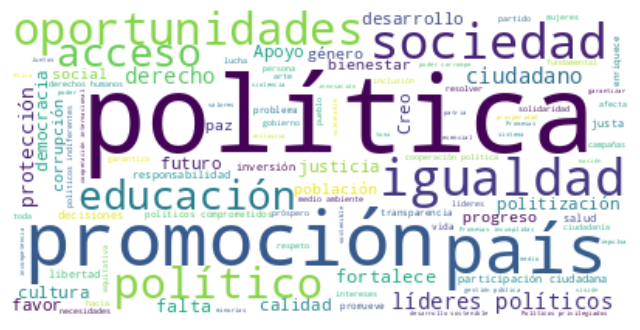

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text ="".join(frase for frase in train['frase'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=spanish_stopwords).generate(text)

# Display the generated image:
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

##Añadir prueba con otro algoritmo

import nltk
nltk.download('punkt')
#Creamos un Pipeline con los parámetros mejores
pipeline = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,
            max_features=1000
            )),
    ('cls', LinearSVC(C=.2, loss='squared_hinge',max_iter=1000,multi_class='ovr',
             random_state=None,
             penalty='l2',
             tol=0.0001
             )),
])
#ajustamos el modelo at corpus de TASS
pipeline.fit(train_ini['frase'], train_ini['etiqueta'])
#now we predict on the new tweets dataset
predicciones= pipeline.predict(train_200['frase'])
train_200['prediccion']=predicciones
print(train_200)
print(pipeline.predict(['Que te vote chapote']))

from sklearn.metrics import classification_report

print(classification_report(train_200['etiqueta'], predicciones, target_names=["Negativo","Positivo"]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tend

                                                 frase  etiqueta  prediccion
491  "Construyamos un México fuerte y próspero para...         1           1
15   "El respeto es la clave para un diálogo constr...         1           1
196  Los líderes políticos con empatía escuchan y c...         1           1
426               "Por una patria justa y equitativa"          1           0
3    La corrupción política mina el progreso de la ...         0           0
..                                                 ...       ...         ...
528  Políticos sin visión, el país se encuentra est...         0           0
215             "Discurso vacío, soluciones ausentes."         0           0
224  Los discursos populistas prometen soluciones r...         0           0
247  Las alianzas políticas basadas en conveniencia...         0           0
105  La colaboración política entre diferentes part...         1           1

[200 rows x 3 columns]
[0]
              precision    recall  f1-score   su

<ipython-input-4-94111e5bb589>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_200['prediccion']=predicciones


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_200['etiqueta'], predicciones, target_names=["Negativo","Positivo"]))

##testSemi.to_csv('predicciones.csv',encoding='utf-8')
##files.download('predicciones.csv')

##Añadir classification report

              precision    recall  f1-score   support

    Negativo       0.92      0.85      0.88       103
    Positivo       0.86      0.92      0.89        97

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



##Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

vectorizer =TfidfVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,

            ngram_range=(1, 1),
            max_features=1000
            )
classifier_tfidf = LogisticRegression(C=0.8)
model_tfidf = Pipeline([("vectorizer", vectorizer), ("classifier", classifier_tfidf)])

model_tfidf.fit(train_ini['frase'], train_ini['etiqueta'])


predicciones = model_tfidf.predict(train_200['frase'])
print(classification_report(train_200['etiqueta'], predicciones, target_names=["Negativo","Positivo"]))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  wa

              precision    recall  f1-score   support

    Negativo       0.84      0.89      0.87       103
    Positivo       0.88      0.82      0.85        97

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



##**Entrenamiento conjunto grande**

In [ ]:
train_filter= train_200.drop(train_200[train_200['prediccion']!=train_200['etiqueta']].index)
print(train_filter)

train_300= pd.concat([train_ini,train_filter])

                                                 frase  etiqueta  prediccion
491  "Construyamos un México fuerte y próspero para...         1           1
15   "El respeto es la clave para un diálogo constr...         1           1
196  Los líderes políticos con empatía escuchan y c...         1           1
3    La corrupción política mina el progreso de la ...         0           0
68   La falta de voluntad política obstaculiza la l...         0           0
..                                                 ...       ...         ...
528  Políticos sin visión, el país se encuentra est...         0           0
215             "Discurso vacío, soluciones ausentes."         0           0
224  Los discursos populistas prometen soluciones r...         0           0
247  Las alianzas políticas basadas en conveniencia...         0           0
105  La colaboración política entre diferentes part...         1           1

[175 rows x 3 columns]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

##Añadir prueba con otro algoritmo

import nltk
nltk.download('punkt')
#Creamos un Pipeline con los parámetros mejores
pipeline = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,
            ngram_range=(1, 1),
            max_features=1000
            )),
    ('cls', LinearSVC(C=.2, loss='squared_hinge',max_iter=1000,multi_class='ovr',
             random_state=None,
             penalty='l2',
             tol=0.0001
             )),
])
#ajustamos el modelo at corpus de TASS
pipeline.fit(train_300['frase'], train_300['etiqueta'])
#now we predict on the new tweets dataset
predicciones= pipeline.predict(train_all['frase'])
train_all['prediccion']=predicciones
print(train_all)
print(pipeline.predict(['España es un gran pais lleno de buenas personas']))

from sklearn.metrics import classification_report

print(classification_report(train_all['etiqueta'], predicciones, target_names=["Negativo","Positivo"]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 

                                                 frase  etiqueta  prediccion
309  La cooperación política entre partidos fortale...         1           1
53   El tribalismo político divide a la sociedad en...         0           0
310      "Promesas incumplidas, confianza erosionada."         0           0
466  Creo en la promoción de políticas de igualdad ...         1           1
6       La polarización política divide a la sociedad.         0           0
..                                                 ...       ...         ...
283  La politización de los servicios públicos afec...         0           0
61   El oportunismo político utiliza tragedias para...         0           1
337  La política de protección de los derechos de l...         1           1
255  La politiquería oportunista se aprovecha de la...         0           0
379  La cooperación política entre partidos busca e...         1           0

[900 rows x 3 columns]
[0]
              precision    recall  f1-score   su

<ipython-input-8-3ea73cf7244e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_all['prediccion']=predicciones


In [ ]:
train_filter= train_all.drop(train_all[train_all['prediccion']!=train_all['etiqueta']].index)
print(train_filter)

train_semiSupervisado= pd.concat([train_300,train_filter])

                                                 frase  etiqueta  prediccion
309  La cooperación política entre partidos fortale...         1           1
53   El tribalismo político divide a la sociedad en...         0           0
310      "Promesas incumplidas, confianza erosionada."         0           0
6       La polarización política divide a la sociedad.         0           0
207  La falta de transparencia en la política gener...         0           0
..                                                 ...       ...         ...
178  "La igualdad de oportunidades, la justicia soc...         1           1
9       "La transparencia es esencial en la política."         1           1
283  La politización de los servicios públicos afec...         0           0
337  La política de protección de los derechos de l...         1           1
255  La politiquería oportunista se aprovecha de la...         0           0

[780 rows x 3 columns]


#**REDES NEURONALES**

In [ ]:
##Conjunto de datos de test
validation=upload_files()


Saving ValidBERT.csv to ValidBERT.csv
User uploaded file "ValidBERT.csv" with length 36530 bytes


In [ ]:
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split


train=train_semiSupervisado

train_x,test_x,train_y,test_y=train_test_split(train['frase'],train['etiqueta'],test_size=0.1)


from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer( lower=True)
tokenizer.fit_on_texts(train_x)

vocab_size = len(tokenizer.word_index) + 1


sequences = tokenizer.texts_to_sequences(train_x)
X_train = sequence.pad_sequences(sequences, maxlen=600, padding='post')


tokenizer.fit_on_texts(test_x)

vocab_size = len(tokenizer.word_index) + 1


sequences = tokenizer.texts_to_sequences(test_x)
X_test = sequence.pad_sequences(sequences, maxlen=600, padding='post')


X_train

array([[ 5, 92, 12, ...,  0,  0,  0],
       [ 1, 45,  2, ...,  0,  0,  0],
       [ 5, 29,  9, ...,  0,  0,  0],
       ...,
       [ 1, 47,  2, ...,  0,  0,  0],
       [ 1,  8,  2, ...,  0,  0,  0],
       [ 1, 49, 12, ...,  0,  0,  0]], dtype=int32)

In [ ]:
#!pip install keras==2.12.0rc1
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping




numpy.random.seed(42)

# Creamos la arquitectura LSTM
embedding_vector_length = 64
inputs = keras.Input(shape=(None,), dtype="int32")
x = Embedding(vocab_size,32)(inputs)

x = Bidirectional(LSTM(8))(x)
# Add a classifier
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)

print(model.summary())

# Compilamos el modelo
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

callbacks = [EarlyStopping(patience=2)]
# Entrenamos el modelo
H = model.fit(X_train, train_y, epochs=10, validation_data=(X_test, test_y), batch_size=64, callbacks=callbacks)


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_39 (Embedding)    (None, None, 32)          38144     
                                                                 
 bidirectional_51 (Bidirecti  (None, 16)               2624      
 onal)                                                           
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
15/15 [==============================] - 27s 1s/step - loss: 0.6869 - accuracy: 0.5269 - val_loss: 0.687

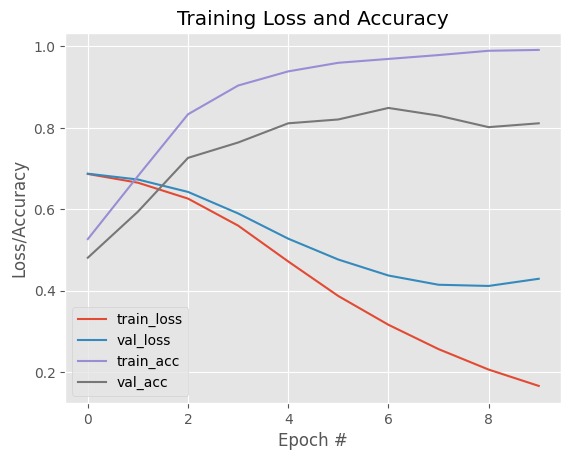

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:


test=validation

tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(test['frase'])

sequences = tokenizer.texts_to_sequences(test['frase'])
X_test = sequence.pad_sequences(sequences, maxlen=600, padding='post')

predictions = model.predict(X_test, batch_size=128)
predictions_int = [np.round(x) for x in predictions]
print(classification_report(test['etiqueta'], predictions_int, target_names=['Negativo','Positivo']))

3/3 [==============================] - 3s 715ms/step
              precision    recall  f1-score   support

    Negativo       0.84      0.27      0.41       150
    Positivo       0.57      0.95      0.71       150

    accuracy                           0.61       300
   macro avg       0.70      0.61      0.56       300
weighted avg       0.70      0.61      0.56       300



###**BERT**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import keras
from tqdm import tqdm
import pickle
from keras.models import Model
import keras.backend as K
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import itertools
from keras.models import load_model
from sklearn.utils import shuffle
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not insta

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/config.js

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/model.safetensors
Loaded 109,482,240 parameters in the TF 2.0 model.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###**Tokenizacion BERT**###

In [ ]:
input_ids=[]
attention_masks=[]

for sent in train['frase']:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(train['etiqueta'])

len(input_ids),len(attention_masks),len(labels)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


(1055, 1055, 1055)

In [ ]:
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2)
print('Train inp shape {} Val input shape {}\\nTrain label shape {} Val label shape {}\\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp.shape,val_inp.shape,train_label.shape,val_label.shape,train_mask.shape,val_mask.shape))

Train inp shape (844, 64) Val input shape (211, 64)\nTrain label shape (844,) Val label shape (211,)\nTrain attention mask shape (844, 64) Val attention mask shape (211, 64)


In [ ]:
log_dir='tensorboard_data/tb_bert'
model_save_path='./models/bert_model.h5'

callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True),keras.callbacks.TensorBoard(log_dir=log_dir)]

print('\nBert Model',bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_41 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [ ]:
history=bert_model.fit([train_inp,train_mask],train_label,batch_size=32,epochs=4,validation_data=([val_inp,val_mask],val_label),callbacks=callbacks)


Epoch 1/4
27/27 [==============================] - 802s 28s/step - loss: 0.5396 - accuracy: 0.7393 - val_loss: 0.4304 - val_accuracy: 0.8389
Epoch 2/4
27/27 [==============================] - 752s 28s/step - loss: 0.2975 - accuracy: 0.8910 - val_loss: 0.1668 - val_accuracy: 0.9573
Epoch 3/4
27/27 [==============================] - 754s 28s/step - loss: 0.1126 - accuracy: 0.9751 - val_loss: 0.1353 - val_accuracy: 0.9573
Epoch 4/4
27/27 [==============================] - 762s 28s/step - loss: 0.0588 - accuracy: 0.9905 - val_loss: 0.0309 - val_accuracy: 0.9953


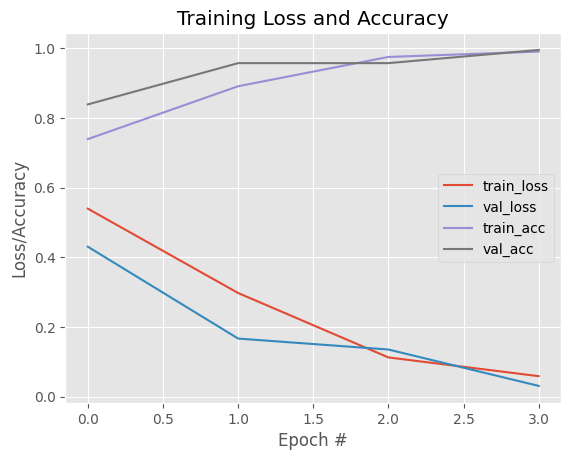

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
H=history
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 4), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 4), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 4), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 4), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
##model_save_path='./bert_model.h5'

##bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)
#bert_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
#bert_model.load_weights(model_save_path)


val_inp=[]
val_mask=[]


for sent in validation['frase']:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    val_inp.append(bert_inp['input_ids'])
    val_mask.append(bert_inp['attention_mask'])



val_inp=np.asarray(val_inp)
val_mask=np.array(val_mask)
val_labels=np.array(validation['etiqueta'])

len(input_ids),len(attention_masks),len(labels)


preds = bert_model.predict([val_inp,val_mask],batch_size=64)





/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 12s 12s/step


In [ ]:
preds_bin=[]
##print(preds)
##print(preds[0])
for pred in preds[0]:
  if(pred[0]>pred[1]):
      preds_bin.append(0)
  else:
    preds_bin.append(1)
pred_labels=preds_bin
f1 = f1_score(val_labels,pred_labels)
print('F1 score',f1)
print('Classification Report')
print(classification_report(val_labels,pred_labels,target_names=['Negativo','Positivo']))



F1 score 0.9367088607594936
Classification Report
              precision    recall  f1-score   support

    Negativo       0.99      0.88      0.93       150
    Positivo       0.89      0.99      0.94       150

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



Comparación con SVC y Logistic Regression

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

##Añadir prueba con otro algoritmo

import nltk
nltk.download('punkt')
#Creamos un Pipeline con los parámetros mejores
pipeline = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,
            ngram_range=(1, 1),
            max_features=1000
            )),
    ('cls', LinearSVC(C=0.2,loss='squared_hinge', max_iter=100,multi_class='ovr',
             random_state=None,
             penalty='l2',
             tol=0.0001
             )),
])
#ajustamos el modelo at corpus de TASS
pipeline.fit(train['frase'], train['etiqueta'])
#now we predict on the new tweets dataset
predicciones= pipeline.predict(validation['frase'])

validation['prediccion']=predicciones

from sklearn.metrics import classification_report

print(classification_report(validation['etiqueta'], predicciones, target_names=["Negativo","Positivo"]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 

              precision    recall  f1-score   support

    Negativo       0.93      0.86      0.90       150
    Positivo       0.87      0.94      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
from sklearn.linear_model import LogisticRegression

vectorizer =TfidfVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,

            ngram_range=(1, 1),
            max_features=1000
            )
classifier_tfidf = LogisticRegression(C=0.8)
model_tfidf = Pipeline([("vectorizer", vectorizer), ("classifier", classifier_tfidf)])

model_tfidf.fit(train['frase'], train['etiqueta'])


predicciones = model_tfidf.predict(validation['frase'])

print(classification_report(validation['etiqueta'], predicciones, target_names=["Negativo","Positivo"]))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  wa

              precision    recall  f1-score   support

    Negativo       1.00      0.73      0.84       150
    Positivo       0.79      1.00      0.88       150

    accuracy                           0.86       300
   macro avg       0.89      0.86      0.86       300
weighted avg       0.89      0.86      0.86       300

